<a href="https://colab.research.google.com/github/sanjueranga/Kaggle-compititions/blob/main/Binary_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Cat vs Dog**


**Using Logistic Regression to identify cats and dogs**


    kaggle competition data set , By Microsoft Research 
    https://www.kaggle.com/competitions/dogs-vs-cats/


In [ ]:
! pip install -q kaggle

In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle competitions download -c dogs-vs-cats

 97% 791M/812M [00:04<00:00, 187MB/s]
100% 812M/812M [00:04<00:00, 173MB/s]


In [ ]:
! unzip dogs-vs-cats.zip

Archive:  dogs-vs-cats.zip
  inflating: sampleSubmission.csv    
  inflating: test1.zip               
  inflating: train.zip               


In [ ]:
! unzip train.zip
! unzip test1.zip

### **1. Packages**



In [ ]:
import numpy as np
import pandas as pd
import copy
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
import os 
import matplotlib.image as img
from numpy import asarray

%matplotlib inline



## **Image Preprocessing**

In [ ]:
TRAIN_DIR_PATH = './train'
file_names = os.listdir(TRAIN_DIR_PATH)
print('There are {} number of images in directory.'.format(len(file_names)))

There are 25000 number of images in directory.


In [ ]:
def to_dataframe(file_names):
    files, labels = list(), list()
   
    for file in file_names:
      
        files.append(file)
        labels.append(file[:3])
        
        
    df = pd.DataFrame({'filename':files, 'label':labels})
    return df



In [ ]:
df = to_dataframe(file_names)

In [ ]:
df.head()

,filename,label
0,cat.12455.jpg,cat
1,cat.822.jpg,cat
2,dog.1948.jpg,dog
3,dog.11623.jpg,dog
4,cat.10570.jpg,cat


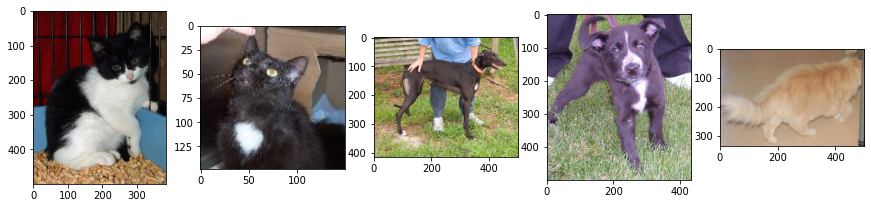

In [ ]:
plt.figure(figsize=(15,7))
for i, c in enumerate(range(5), start=1):
    im = img.imread('./train/'+file_names[c])
    plt.subplot(2,5,i)
    plt.imshow(im)

In [ ]:
WIDTH = 64 #width and heigt in px
HEIGHT = 64
resized_images=[]
for file in file_names:
    img=Image.open('./train/'+file)
    resized_images.append(img.resize((WIDTH,HEIGHT)))

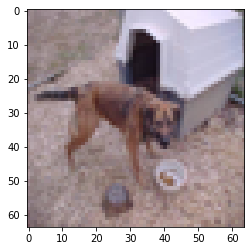

In [ ]:
plt.imshow(resized_images[100])

**Converting images into numpy arrays**

In [ ]:
def image_to_array(img):

# convert image to numpy array
  data = asarray(resized_images[img])
  return data

In [ ]:
im_list = []
for i in range(len(resized_images)):
  
  im_list.append(image_to_array(i))
  

train_x_orig = np.array(im_list)

# making a np array shpae of (m,height,width,3) m= number of examples

In [ ]:
train_x_orig.shape

(25000, 64, 64, 3)

**making Y array shape of (1,m)**

In [ ]:
df['label'].replace(['cat', 'dog'],
                        [0, 1], inplace=True)

In [ ]:
train_y_orig= np.array(df['label'])

In [ ]:
train_y_orig.shape

(25000,)

In [ ]:
train_y_orig = train_y_orig[:,np.newaxis]

In [ ]:
train_y_orig =train_y_orig.T

In [ ]:
train_y_orig.shape

(1, 25000)

**Splitting a test set from train set**

In [ ]:
train_x = train_x_orig[:20000]
test_x = train_x_orig[20000:]
train_y = train_y_orig[:,:20000]
test_y = train_y_orig[:,20000:]

In [ ]:
m_train = train_x.shape[0]
m_test = test_x.shape[0]
num_px = train_x.shape[1]



print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_x.shape))
print ("train_set_y shape: " + str(train_y.shape))
print ("test_set_x shape: " + str(test_x.shape))
print ("test_set_y shape: " + str(test_y.shape))

Number of training examples: m_train = 20000
Number of testing examples: m_test = 5000
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (20000, 64, 64, 3)
train_set_y shape: (1, 20000)
test_set_x shape: (5000, 64, 64, 3)
test_set_y shape: (1, 5000)


y=[0]


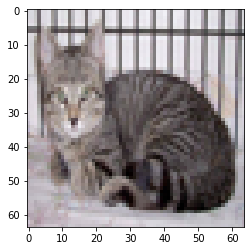

In [ ]:
INDEX = 108
plt.imshow(train_x[INDEX])
print("y="+str(train_y[:,INDEX]))
# 0 for cats, 1 for dogs

Reshaping images of shape of (WIDTH,HEIGHT,3) in a numpy-array of shape(WIDTH x HEIGHT x3), Now we have flatten images

In [ ]:
train_set_x_flatten = train_x.reshape(train_x.shape[0],-1).T
test_set_x_flatten = test_x.reshape(test_x.shape[0],-1).T

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_y.shape))


train_set_x_flatten shape: (12288, 20000)
train_set_y shape: (1, 20000)
test_set_x_flatten shape: (12288, 5000)
test_set_y shape: (1, 5000)


**"Standardize" the data**

In [ ]:
train_x = train_set_x_flatten /255.
test_x= test_set_x_flatten / 255.


### **Building Logistic Regression algorithm** 
Logistic Regression actually is a very simple Neural Network

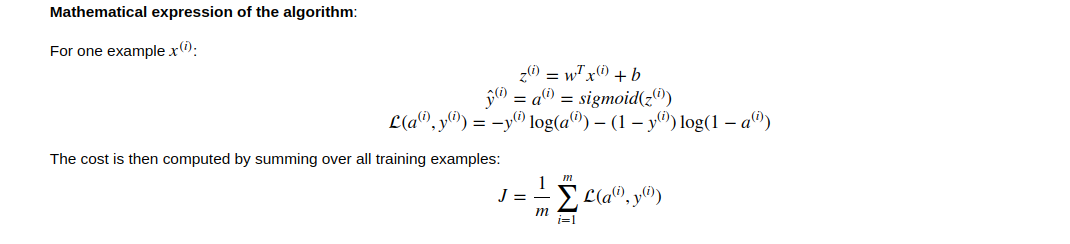

Thanks to Deeplearning.ai

implementing `sigmoid()`. As we've seen in the figure above, we need to compute $sigmoid(z) = \frac{1}{1 + e^{-z}}$ for $z = w^T x + b$ to make predictions. Us

In [ ]:
def sigmoid(z):
  s=1/(1+np.exp(-z))

  return s

**initializing Parameters**

We need to initialize parameters W and b of Z, with zeros. w will a be vector that size of "dim" 

In [ ]:
def initialize_with_zeros(dim):

  w = np.zeros(shape=(dim,1))
  b = 0.0


  return w,b



## **Foward and Backward propagation**

**Foward propagation**







1. we compute $A = \sigma(w^T X + b) = (a^{(1)}, a^{(2)}, ..., a^{(m-1)}, a^{(m)})$
2. and  calculate the cost function: $J = -\frac{1}{m}\sum_{i=1}^{m}(y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)}))$



**Backward propagationt**

we compute derivatives uisng following fomulas



1.   $$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T$$
2.   $$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})$$



In [ ]:
def propagate(w,b,X,Y):
  """
  Arguments 
    w - weights a numpy- array size of (num_px*num_px*3,1)
    b - bias , a scalar 
    X - data of size (num_px*num_px*3, number_of_training examples)
    Y - true labels, vector of size (1, number of examples) , 0 - cat, 1- dog

  return 
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
  """

  m = X.shape[1]

  #Foward propagation

  
  A=sigmoid(np.dot(w.T,X)+b)
  cost = (-1/m)*(np.sum(Y*np.log(A)+(1-Y)*np.log(1-A)))

  #Backward propagation

  dw = (1/m)*np.dot(X,(A-Y).T)
  db = (1/m)*np.sum(A-Y)


  cost = np.squeeze(np.array(cost))

    
  grads = {"dw": dw,
             "db": db}
    
  return grads, cost

### **Optimization**

 the optimization function. The goal is to learn $w$ and $b$ by minimizing the cost function $J$. For a parameter $\theta$, the update rule is $ \theta = \theta - \alpha \text{ } d\theta$, where $\alpha$ is the learning rate.

In [ ]:
def optimize(w, b, X, Y, num_iterations=100, learning_rate=0.009, print_cost=False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
   
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
 
    """
    
    w = copy.deepcopy(w)
    b = copy.deepcopy(b)
    
    costs = []
    
    for i in range(num_iterations):
        
        grads, cost= propagate(w,b,X,Y)
       
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        #updataing two rules
        w=w-learning_rate*dw
        b=b-learning_rate*db
        
        
        
        # Recording the costs
        if i % 100 == 0:
            costs.append(cost)
        
            # Print the cost every 100 training iterations
            if print_cost:
                print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

## **Predict**

propagrate() and optimize() return learned w and b, now we need to calculate ,
$\hat{Y} = A = \sigma(w^T X + b)$
and 
Convert the entries of a into 0 (if activation <= 0.5) or 1 (if activation > 0.5), stores the predictions in a vector `Y_prediction`

In [ ]:
def predict(w,b,X):
  '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
  m = X.shape[1]
  Y_prediction = np.zeros((1,m))
  w = w.reshape(X.shape[0], 1)

  # Compute vector "A" predicting the probabilities of a cat being present in the picture
    
  A=sigmoid(np.dot(w.T,X)+b)
    
  for i in range(A.shape[1]):
        
      # Convert probabilities A[0,i] to actual predictions p[0,i]
        
      # YOUR CODE STARTS HERE
      if A[0,i]>0.5:
            Y_prediction[0,i]=1
      else:
            Y_prediction[0,i]=0
            
  return Y_prediction

In [ ]:
def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):
    """
    Builds the logistic regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to True to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """

    #intialize w,b with zeros
    w, b = initialize_with_zeros(X_train.shape[0])

    #gradient descent
    params, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    # Retrieve parameters w and b from dictionary "params"
    w = params["w"]
    b = params["b"]
    
    #predict test/train sets
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    # Print train/test Errors
    if print_cost:
        print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
        print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

Train the model

In [ ]:
logistic_regression_model = model(train_x, train_y, test_x, test_y, num_iterations=2000, learning_rate=0.0006, print_cost=True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.684907
Cost after iteration 200: 0.680633
Cost after iteration 300: 0.677629
Cost after iteration 400: 0.675316
Cost after iteration 500: 0.673442
Cost after iteration 600: 0.671869
Cost after iteration 700: 0.670514
Cost after iteration 800: 0.669327
Cost after iteration 900: 0.668271
Cost after iteration 1000: 0.667322
Cost after iteration 1100: 0.666462
Cost after iteration 1200: 0.665676
Cost after iteration 1300: 0.664954
Cost after iteration 1400: 0.664287
Cost after iteration 1500: 0.663667
Cost after iteration 1600: 0.663088
Cost after iteration 1700: 0.662545
Cost after iteration 1800: 0.662035
Cost after iteration 1900: 0.661553
train accuracy: 60.53 %
test accuracy: 59.54 %


**Plotting learning curve**

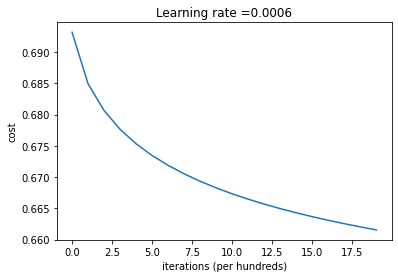

In [ ]:
costs = np.squeeze(logistic_regression_model['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(logistic_regression_model["learning_rate"]))
plt.show()

In [ ]:
def test_my_img(index):
  TEST_DIR_PATH = './test1'

  test_file_names = os.listdir(TEST_DIR_PATH)
  file= test_file_names[index]
  test_img=Image.open('./test1/'+file)
  resized_test_img = test_img.resize((WIDTH,HEIGHT))
  my_img= asarray(resized_test_img)
  my_img = my_img/255.
  my_img = my_img.reshape((1, num_px * num_px * 3)).T
  return test_img,my_img

'[[0.]]'

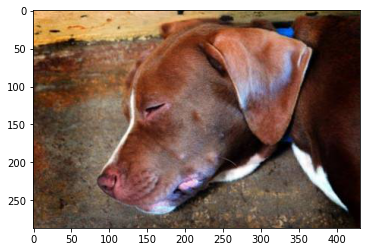

In [ ]:
test_img,my_img = test_my_img(2575)
my_predicted_img = predict(logistic_regression_model["w"],logistic_regression_model["b"],my_img)
plt.imshow(test_img)
str(my_predicted_img)